## ex2. Regularized logistic regression

you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA).

Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or rejected.

#### Input data: ex2data2.txt

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Load and check data

In [2]:
# Load training data, the first two columns contains the exam score and the third column contains the label
# The .txt does not contain column header so we need to use the names=['test1','test2', 'result'] to create column names
train=pd.read_csv('ex2data2.txt', names=['test1','test2', 'result'])
print(train.head(2),'\n')
print(train.tail(2), '\n')
print(train.shape)

      test1    test2  result
0  0.051267  0.69956       1
1 -0.092742  0.68494       1 

        test1     test2  result
116 -0.006336  0.999270       0
117  0.632650 -0.030612       0 

(118, 3)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
test1     118 non-null float64
test2     118 non-null float64
result    118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [4]:
train.describe()

,test1,test2,result
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [5]:
np.corrcoef(train['test1'], train['test2'])

array([[ 1.        , -0.13870942],
       [-0.13870942,  1.        ]])

In [6]:
y=train['result']
m=train.shape[0]

### 2: Visualization: plot

we start by plotting the data we are working with

Text(11.6617,0.5,'Microchip test 2')

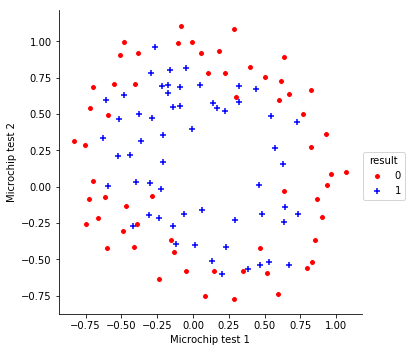

In [8]:
sns.pairplot(x_vars='test1', y_vars='test2', data=train, hue='result', size=5, markers=['o','+'], palette={0:'r', 1:'b'})
plt.xlabel('Microchip test 1')
plt.ylabel("Microchip test 2")

### 3. Feature mapping

one way to fit the data better is to create more features from the data points.

In [9]:
#mapFeature, map the features into all polynomial terms of x1 and x2 up to the sixth power
def mapFeature(X1, X2):
    
    """
    MAPFEATURE Feature mapping function to polynomial features
    MAPFEATURE(X1, X2) maps the two input features to quadratic features used in the regularization exercise.
    returns a new feature array with more features, comprising of X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
    """
    degree = 6;
    out = pd.Series(np.ones(len(X1)))  #x0=1
    for i in range(1,degree+1):
        for j in range(0,i+1):
            out=pd.concat((out, X1**(i-j)*(X2**j)), axis=1)
    return out

In [10]:
X=mapFeature(train['test1'],train['test2'])
# features are 1, x1,x2,x1^2,x1x2, x2^2,x1^3....,x2^6
X.shape

(118, 28)

### 4. Cost function and gradient for regularized logistic regression

We will not regularize theta0 since theta0*1 is the intercept

The cost function for regularization is

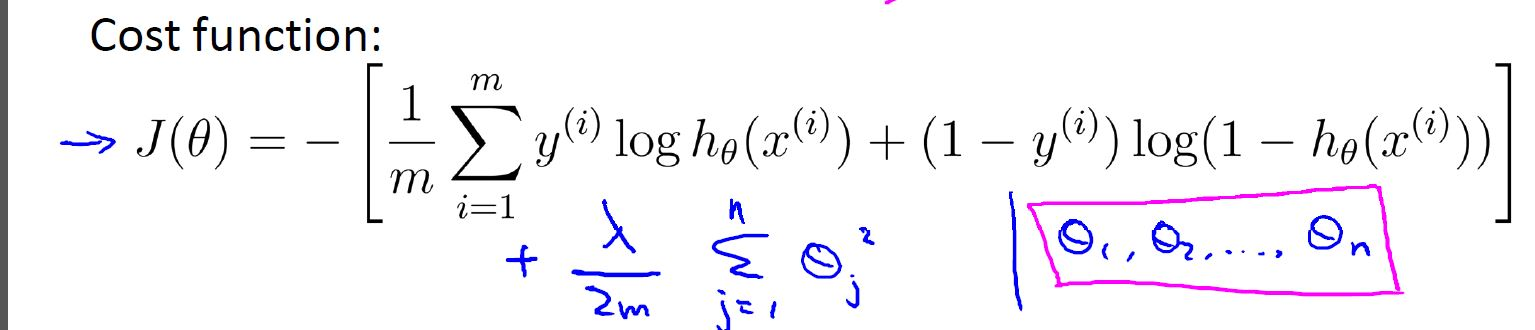

In [3]:
from IPython.display import Image
Image(filename="C:/Users/jzhang11/Python Scripts/stanford/Andrew Ng Machine Learning course projects/pic/regularized logistic cost function.jpg", height=200, width=500)

The gradient for regularized logistic regression is

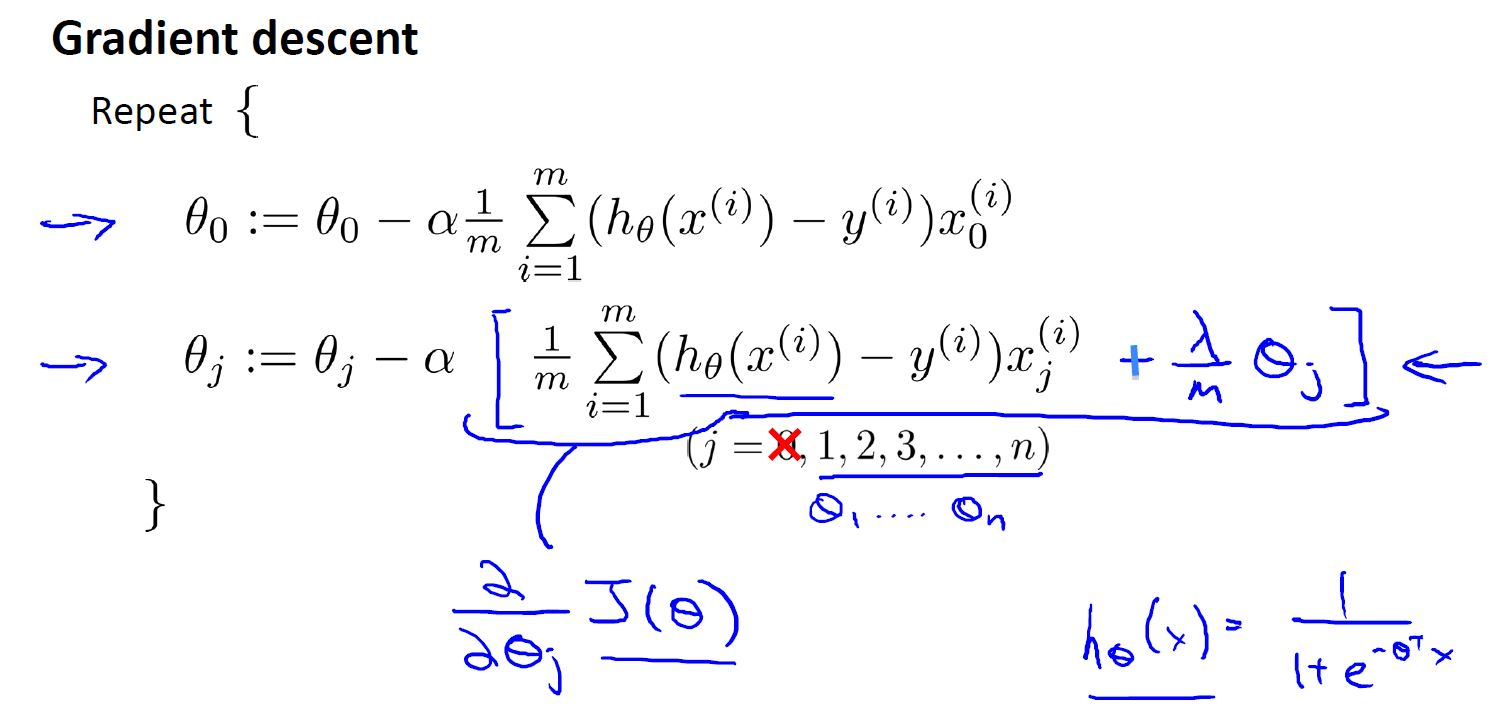

In [4]:
from IPython.display import Image
Image(filename="C:/Users/jzhang11/Python Scripts/stanford/Andrew Ng Machine Learning course projects/pic/gradient descent for regularized logistic regression.jpg", height=400, width=500)

In [11]:
def sigmoid(z):
    return 1/(1+np.exp(-1*z))
    """
    SIGMOID Compute sigmoid function
    g = SIGMOID(z) computes the sigmoid of z.
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """  

In [12]:
def costFunctionReg(theta, X, y, lambdapar):

    """
    COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
    J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
    theta as the parameter for regularized logistic regression and the
    gradient of the cost w.r.t. to the parameters.
    """
    # Initialize some useful values
    m = len(y) 
    J = 0
    grad = np.zeros(len(theta))
    newtheta=theta.copy()
    newtheta[0]=0

    J=(-y.T.dot(np.log(sigmoid(X.dot(theta))))-(1-y).T.dot(np.log(1-sigmoid(X.dot(theta)))))/m+lambdapar*(newtheta*newtheta).sum()/2/m    
    grad=X.T.dot((sigmoid(X.dot(theta))-np.array(y).reshape(m,1)))/m+lambdapar/m*newtheta
    return J, grad

In [13]:
# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1], 1))
print(initial_theta.shape)
lambdapar=1

(28, 1)


In [14]:
J,grad=costFunctionReg(initial_theta, X, y, lambdapar)
print('Cost returned by our costfunction is', np.round(J[0],3))
print('True cost from the ex2.pdf is 0.693')

Cost returned by our costfunction is 0.693
True cost from the ex2.pdf is 0.693


### 5. Learning parameters using scipy.optimize in Python

In [15]:
import numpy as np
import scipy.optimize as op

X=np.array(X)
y=np.array(y)

def Sigmoid(z):
    return 1/(1 + np.exp(-z));

def Gradient(theta,x,y):
    m , n = x.shape
    theta = theta.reshape((n,1))
    newtheta=theta.copy()
    newtheta[0]=0
    y = y.reshape((m,1))
    sigmoid_x_theta = Sigmoid(x.dot(theta));
    grad = ((x.T).dot(sigmoid_x_theta-y))/m+lambdapar/m*newtheta;
    return grad.flatten();

def CostFunc(theta,x,y):
    m,n = x.shape; 
    theta = theta.reshape((n,1))
    newtheta=theta.copy()
    newtheta[0]=0 
    y = y.reshape((m,1));
    term1 = np.log(Sigmoid(x.dot(theta)));
    term2 = np.log(1-Sigmoid(x.dot(theta)));
    term1 = term1.reshape((m,1))
    term2 = term2.reshape((m,1))
    term = y * term1 + (1 - y) * term2;
    J = -((np.sum(term))/m)+lambdapar*(newtheta*newtheta).sum()/2/m ;
    return J;

m , n = X.shape;
initial_theta = np.zeros(n);
# jac: Jacobian (gradient) of objective function. Only for CG, BFGS, Newton-CG, L-BFGS-B, TNC, SLSQP, dogleg, trust-ncg.
Result = op.minimize(fun = CostFunc, x0 = initial_theta, args = (X, y),method = 'TNC',jac = Gradient);
optimal_theta = Result.x;     
optimal_theta

array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.9174319 ,
       -1.43166929,  0.12393227, -0.36553118, -0.35725403, -0.17516291,
       -1.45817009, -0.05098418, -0.61558551, -0.27469165, -1.19271297,
       -0.2421784 , -0.20603295, -0.04466179, -0.27778953, -0.29539513,
       -0.45645981, -1.04319156,  0.02779373, -0.29244874,  0.01555761,
       -0.32742407, -0.14389151, -0.92467487])

### 6. Plot decision boundary

In [17]:
def plotData(X, y):
#PLOTDATA Plots the data points X and y into a new figure 
#   PLOTDATA(x,y) plots the data points with + for the positive examples
#   and o for the negative examples. X is assumed to be a Mx2 matrix.
    # Find indices of Positive and negative examples
    pos=np.where(y==1)
    neg=np.where(y==0)
    p1=plt.scatter(X[pos,0], X[pos,1], marker='+', label='y=1')
    p1=plt.scatter(X[neg,0], X[neg,1], marker='o', label='y=0')
    

C:\Users\jzhang11\AppData\Local\Continuum\anaconda3add\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth', 'label'
  s)


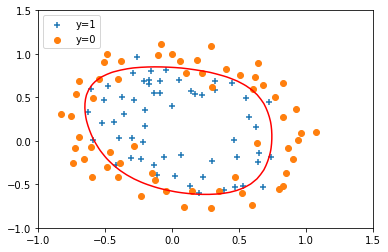

In [22]:
def plotDecisionBoundary(theta, X, y):
#PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
#the decision boundary defined by theta
#   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
#   positive examples and o for the negative examples. X is assumed to be 
#   a either 
#   1) Mx3 matrix, where the first column is an all-ones column for the 
#      intercept.
#   2) MxN, N>3 matrix, where the first column is all-ones

    import matplotlib.pyplot as plt
    import numpy as np
    import mapFeature as mf

    # Plot Data
    fig = plt.figure()
    plotData(X[:,1:3], y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([min(X[:,1])-2,  max(X[:,1])+2])

        # Calculate the decision boundary line
        plot_y = (-1./theta[2])*(theta[1]*plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y, label='Decision Boundary')
        
        # Legend, specific for the exercise
        plt.legend(loc='upper left')
        
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u),len(v) ))
        # mf.mapFeature(np.array([u[i]]), np.array([v[j]])) create the polynomial features for u,v (like x1,x2)
        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = np.dot(mf.mapFeature(np.array([u[i]]), np.array([v[j]])),theta) #z=X*theta
        z = np.transpose(z) # important to transpose z before calling contour

        # Plot z = 0
        # Notice you need to specify the level 0
        # we get collections[0] so that we can display a legend properly
        # make a contour plot of an array *Z*. u,v specifies the x,y coordinate
        plt.contour(u, v, z, levels=[0], linewidth=2, label='Decision Boundary',colors='r').collections[0]
        plt.legend(loc='upper left')
        
plotDecisionBoundary(optimal_theta, X, y)    

### 7. Evaluate a logistic regression


In [20]:
def predict(theta, X):
    """
    PREDICT Predict whether the label is 0 or 1 using learned logistic regression parameters theta
    p = PREDICT(theta, X) computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)
    """
    m,n = X.shape
    p = np.zeros((m, 1))
    theta_x=X.dot(theta.reshape(n,1))
    prob=Sigmoid(theta_x)
    p=(prob>=0.5).astype(int)
    return p

p=predict(optimal_theta, X)

print('Train Accuracy:', np.round(np.mean((p.reshape(m,)==y).astype(int)) * 100,1));
print('Expected accuracy (approx): 83.1\n');

Train Accuracy: 83.1
Expected accuracy (approx): 83.1

